In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from myst_nb import glue
%config InlineBackend.figure_formats = ['svg']
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
np.random.seed(12345)

# A little point process theory

At its most basic, a point process is a statistical distribution whose samples are _collections of points_. This is somewhat more abstract than distribution that
produces real numbers (like the normal distribution) or integers (like the binomial distribution). In most examples we care about, the points are the times of events
like action potentials or lever presses, though they could also be collections of points in two or more dimensions (locations of cell bodies or foraging sites). 

In this chapter, we will concentrate exclusively on a single kind of very special point process: the Poisson process. This is partly because the Poisson process
is in some senses the _simplest_ type of point process, but it is also a very good approximation to many phenomena we care about. To define the point process, we 
will assume we know a single positive parameter $\lambda > 0$ called the _intensity_ or _rate_ of the process. We will also assume (for the moment) that this 
parameter is a constant, and we will work in one dimension, so that events can be ordered along a line.

Now, here's the definition: Take an interval of time of length $T$. For a Poisson process, the _number_ of events in this time interval is given by a Poisson _distribution_ with parameter $\lambda T$:

$$
p(n) = \frac{e^{-\lambda T}(\lambda T)^n}{n!},
$$

where $n$ is the number of events we observe and $n! = n \cdot (n - 1) \cdot \ldots 1$ is the factorial function that accounts for the fact that the events are _exchangeable_ (it doesn't matter how we label them) and so we need to divide by the number of possible labelings.

Two points to note about this definition:
1. The mean of this distribution is $\lambda T$. That is, the longer the time interval we observe, the more events we expect to see.
1. The rate $\lambda$ is an _intensity_. That is, it has units of "events per unit time."

5

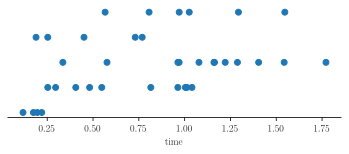

In [22]:
nrealizations = 5
glue("nrealizations", nrealizations)
rate = 8 
glue("example_rate", rate)
samples = stats.poisson.rvs(rate, size=nrealizations)
times = []
indices = []
for idx, s in enumerate(samples):
    isi = stats.expon.rvs(scale=1/rate, size=s) 
    times.extend(np.cumsum(isi)) 
    indices.extend(idx * np.ones_like(isi))

fig = plt.figure(figsize=(6, 2))
plt.scatter(times, indices)
plt.xlabel(r"$\mathrm{time}$")
ax = plt.gca()
ax.spines[['right', 'top', 'left']].set_visible(False)
ax.get_yaxis().set_visible(False)
glue("poisson_realizations", fig, display=False);

```{glue:figure} poisson_realizations
:name: "poisson-examples"

Five example realizations (one per line) of a Poisson process with rate $\lambda = 8$ per second. Each event time is marked with a dot.
```

{numref}`poisson-examples` shows a few example realizations from this process. Note that the number of events in each realization is variable, and that the times between events (what we would call the inter-spike intervals in electrophysiology data) are highly variable. That is, Poisson processes often look clumpier than we might naively expect.

Of course, the other ingredient we needed to generate {numref}`poisson-examples` was some way of randomly drawing times _between_ events. In fact, we can derive an expression for this using a key fact about Poisson processes: for disjoint intervals (periods of time that don't overlap), the numbers of events in each are _independent_. As a result, we can consider breaking an interval of size $T$ into very small intervals $\Delta t$ such that $T = N \Delta t$. We can then calculate the probability that there are no events for a time $T$:

$$
p(\text{no events}) = \prod_{i = 1}^N e^{-\lambda \Delta t} = e^{-\lambda T}
$$

where we have used the fact that probabilities of independent events multiply and that the probability of drawing no events from a Poisson distribution in time $\Delta t$ is $p(0) = e^{\lambda \Delta t}$. Of course, this is the same result that we would have gotten if we had simply asked for the probability of no events from the Poisson in time $T$.

Now, the above expression shows that the probability of no events goes down exponentially fast in $T$. In fact, if we want to turn this into a probability distribution in $T$, we only have to normalize it:

$$
p(T) = \lambda e^{-\lambda T}
$$

which is an exponential random variable with parameter $\lambda$. In other words, we can generate sample event times like those in {numref}`poisson-examples` by choosing inter-event times from an exponential distribution with the same rate parameter.